### Logistic Regression을 그림으로 알아보자!


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import warnings
from sklearn.linear_model import LogisticRegression
import mglearn


Cost 값은 2.863301992416382
Cost 값은 0.27753087878227234
Cost 값은 0.2631648778915405
Cost 값은 0.2581658661365509
Cost 값은 0.2558729350566864
Cost 값은 0.2545683681964874
Cost 값은 0.2536725699901581
Cost 값은 0.25295934081077576
Cost 값은 0.25233232975006104
Cost 값은 0.25174811482429504
[1]


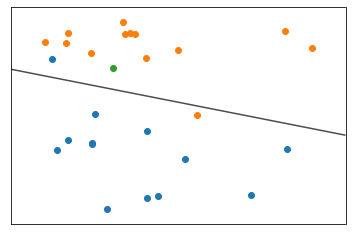

In [35]:
warnings.filterwarnings(action="ignore") # warning출력을 배제

x, y = mglearn.datasets.make_forge()

# 먼저 간단하게 산점도(scatter)를 그려 보자.

# y값이 0인 x를 추출해서 x의 첫번째 컬럼을 x축으로, 
# x의 두번째 컬럼을 y축으로 산점도를 그려보자.
blue = x[y == 0]
plt.scatter(blue[:,0],blue[:,1]) 

orange = x[y == 1]
plt.scatter(orange[:,0],orange[:,1]) 

## machine learning (Logistic Regression)
# train data set (연습용이니 test data set은 넘어가자.)
train_x_data = x
train_y_data = y.reshape(-1,1)

# placeholder
X = tf.placeholder(shape=[None,2], dtype=tf.float32)
Y = tf.placeholder(shape=[None,1], dtype=tf.float32)

# Weight & bias
W = tf.Variable(tf.random_normal([2,1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

# Hypothesis
logit = tf.matmul(X, W) + b
H = tf.sigmoid(logit)

# Cost(loss) function
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = logit,
                                                                 labels = Y))

# train node
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost) # 굳이 optimizer 만들지 않고 여기 opt에 넣어서 축약하자!

# session, 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range(3000):
    _, cost_val = sess.run([train, cost], feed_dict = { X : train_x_data,
                                                          Y : train_y_data})
    if step % 300 == 0:
        print(f"Cost 값은 {cost_val}")
        
        
# 정확도 측정(Accuracy)
# skip : if 95% 이상 나오면 쓸만한 model

# Prediction(예측)
result = sess.run(H, feed_dict={ X : [[9,4]]})
result # 결과값 : 0.834....

plt.scatter(9,4)

# sklearn 모델생성
model = LogisticRegression()
myModel = model.fit(x,y) # logistic model 학습
print(myModel.predict([[9,4]])) # 결과값 : [1]
mglearn.plots.plot_2d_separator(myModel, x, fill=False, 
                                eps=0.5, alpha=0.7) 

# 1과 0을 나누는 기준을 (선)을 긋는다. # Hyperplane

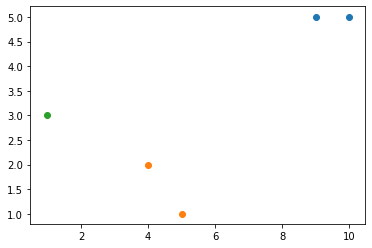

In [37]:
# Logistic을 multinomial로 확장해 보자!
# x쪽 데이터는 시험성적과 출석점수 
# y쪽 데이터는 학점
x = np.array([[10, 5],
               [9, 5],
               [5, 1],
               [4, 2],
               [1, 3]])

y = np.array([["A"],
              ["A"],
              ["B"],
              ["B"],
              ["C"]])

plt.scatter(x[0:2, 0],x[0:2, 1]) # A등급의 점을 찍어보자.
plt.scatter(x[2:4, 0],x[2:4, 1]) # B등급의 점을 찍어보자.
plt.scatter(x[4, 0],x[4, 1]) # C등급의 점을 찍어보자.



In [46]:
import tensorflow as tf

# one-hot encoding
# Y label을 string으로 표현할 수 없으니 이런 표현방법을 통해 Y label 만들어 준다!
# 고양이	강아지	호랑이
# 0 	 1  	0
# 1 	 0  	0
# 0 	 0  	1


# train data set
train_x_data = [[10,7,8,5],
                [8,8,9,4],
                [7,8,2,3],
                [6,3,9,3],
                [7,5,7,4],
                [3,5,6,2],
                [2,4,3,1]]

train_y_data = [[1,0,0],
                [1,0,0],
                [0,1,0],
                [0,1,0],
                [0,1,0],
                [0,0,1],
                [0,0,1]]

# placeholder
X = tf.placeholder(shape=[None,4], dtype=tf.float32)
Y = tf.placeholder(shape=[None,3], dtype=tf.float32)

# Weight & bias
W = tf.Variable(tf.random_normal([4,3]), name="weight")
b = tf.Variable(tf.random_normal([3]), name="bias")

# Hypothesis
logit = tf.matmul(X,W) + b
H = tf.nn.softmax(logit) # sigmoid 에서 softmax로 변경!!!!!

# Cost(loss) Function
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logit,
                                                                    labels=Y))

# train node
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# session & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range(3000):
    _, cost_val = sess.run([train, cost], feed_dict={ X : train_x_data,
                                                        Y : train_y_data})
    if step % 300 == 0:
        print(f"Cost 값 : {cost_val}")

# Accuracy (정확도)
# sess.run(H, feed_dict = { X : [[10,8,9,5]]}) # 임의값으로 예측결과 확인해보기
# array([[9.9095786e-01, 9.0419911e-03, 6.2689011e-08]], dtype=float32)

predict = tf.argmax(H, axis=1) # 가장 큰값의 index번호를 리턴
correct = tf.equal(predict, tf.argmax(Y, axis=1))

# sample 데이터여서 기존의 결과로 정홛도를 확인 => 1.0 나오는게 당연!
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
print("정확도 : {}".format(sess.run(accuracy, feed_dict = { X : train_x_data,
                                                           Y : train_y_data})))



Cost 값 : 8.066079139709473
Cost 값 : 1.849338412284851
Cost 값 : 1.371898889541626
Cost 값 : 1.095597505569458
Cost 값 : 0.8455120325088501
Cost 값 : 0.5786193609237671
Cost 값 : 0.05026910826563835
Cost 값 : 0.04567387327551842
Cost 값 : 0.042345963418483734
Cost 값 : 0.0396796278655529
정확도 : 1.0


## BMI 데이터를 학습한 후 자신의 키와 몸무게를 넣어서 확인헤보자.
## 상태를 확인하기 위해 bmi.csv 파일 가져와서 해결해보자

In [3]:
# library load
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

In [53]:
bmi = pd.read_csv("./data/bmi.csv", skiprows=3)
bmi.head()
bmi.tail()

# train data set 범위
bmi.shape
bmi_num = int(bmi.shape[0] * 0.8)
bmi_num    

# label을 one hot encoding 변환
# numpy 이용
# Y_lab = np.unique(bmi["label"], axis=0)
# y_data=np.eye(Y_lab.shape[0])[bmi["label"]]
# train_y_data=y_data[bmi_num:]

# pandas.get_dummies()
# y_data = pd.get_dummies(bmi["label"])

# tensorflow.one_hot()
y_data = tf.one_hot(bmi["label"], 3)
sess = tf.Session()
y_data = sess.run(y_data)


# minmaxscaler 이용하기
scl = MinMaxScaler()
scl.fit(bmi[["height","weight"]])


# train data set
train_x_data = scl.fit_transform(bmi[["height","weight"]])[:bmi_num]
train_y_data = y_data[:bmi_num]


# placeholder
X = tf.placeholder(shape=[None,2], dtype=tf.float32)
Y = tf.placeholder(shape=[None,3], dtype=tf.float32)

# Weight & bias
W = tf.Variable(tf.random_normal([2,3]), name="weight")
b = tf.Variable(tf.random_normal([3]), name="bias")

# Hypothesis
logit = tf.matmul(X,W) + b
H = tf.nn.softmax(logit)

# Cost Function
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = logit,
                                                                    labels = Y))

# train node 생성
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)


# session & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습

for step in range(30000):
    _, cost_val = sess.run([train, cost], feed_dict={ X : train_x_data,
                                                        Y : train_y_data})
    if step % 3000 == 0:
        print(f"Cost 값 : {cost_val}")
        
# test data set 만들기
test_x_data = MinMaxScaler().fit_transform(bmi[["height","weight"]])[bmi_num:]
test_y_data = y_data[bmi_num:]



Cost 값 : 1.2941728830337524
Cost 값 : 0.3616917133331299
Cost 값 : 0.2839779853820801
Cost 값 : 0.24556522071361542
Cost 값 : 0.22129392623901367
Cost 값 : 0.20408686995506287
Cost 값 : 0.1910295933485031
Cost 값 : 0.18066242337226868
Cost 값 : 0.17216189205646515
Cost 값 : 0.16501976549625397


In [54]:
# 정확도 측정

predict = tf.argmax(H, axis=1) # 가장 큰값의 index번호를 리턴
correct = tf.equal(predict, tf.argmax(Y, axis=1))
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
print("정확도 : {}".format(sess.run(accuracy, feed_dict={X:test_x_data,
                                                        Y:test_y_data})))
# 나의 정보 확인
myinfo = scl.transform([[181,75]])
sess.run(tf.argmax(H, axis=1), feed_dict={X : myinfo})

정확도 : 0.9797499775886536


array([1], dtype=int64)

In [56]:
T = int(input())
for _ in range(T):
    a = list(map(int, input().split()))
    scl.fit(bmi[["height","weight"]])
    myinfo = scl.transform([a])
    check_body = sess.run(tf.argmax(H, axis=1), feed_dict={X : myinfo})

    if check_body[0] == 0:
        print("너무마르셨네요.")
    elif check_body[0] == 1:
        print("보기 좋습니다.")
    else:
        print("이럴시간이 없습니다.운동하세요 덜먹으시던가")
    


3
180 55
너무마르셨네요.
171 55
보기 좋습니다.
190 55
너무마르셨네요.


In [57]:
T = int(input())
for _ in range(T):
    q, p = map(int, input().split())
    scl.fit(bmi[["height","weight"]])
    myinfo = scl.transform([[q,p]])
    check_body = sess.run(tf.argmax(H, axis=1), feed_dict={X : myinfo})

    if check_body[0] == 0:
        print("너무마르셨네요.")
    elif check_body[0] == 1:
        print("보기 좋습니다.")
    else:
        print("이럴시간이 없습니다.운동하세요 덜먹으시던가")
    

3
180 55
너무마르셨네요.
171 66
보기 좋습니다.
191 100
이럴시간이 없습니다.운동하세요 덜먹으시던가
